In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
## Load in the randomly generated data
tappy_df=pd.read_csv('Imputed_ALLdata_Ivan.csv')

In [3]:
length=len(list(tappy_df.columns))
length

102

In [4]:
X = tappy_df.iloc[:,0:length-6]
y = tappy_df.iloc[:,length-1]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=.25,
                                                shuffle=True,
                                                random_state=440,
                                                stratify=y)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_reg = LogisticRegression(max_iter=10000)

log_reg.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [9]:
log_reg.predict_proba(X_train)[:,1]

array([9.98736414e-01, 9.99923282e-01, 9.46733056e-01, 1.00000000e+00,
       1.00000000e+00, 9.43255813e-01, 9.80966626e-01, 8.88971680e-01,
       8.61647687e-01, 2.35891670e-01, 3.98062208e-02, 7.49306936e-01,
       9.99999962e-01, 9.99999998e-01, 7.47246954e-01, 9.52442897e-01,
       8.29366136e-01, 9.14880150e-01, 1.00000000e+00, 9.70066048e-01,
       7.75128483e-01, 9.99999991e-01, 1.67346453e-01, 9.58877104e-01,
       7.87617275e-01, 9.72962591e-01, 9.30993671e-01, 1.90878944e-01,
       5.29754891e-05, 2.47783802e-01, 9.94598980e-01, 2.69549454e-03,
       9.85903405e-01, 9.10452565e-03, 9.99993937e-01, 9.88258181e-01,
       7.65036531e-01, 1.00000000e+00, 9.99995956e-01, 5.70502543e-01,
       1.03663496e-01, 8.32531297e-01, 1.00000000e+00, 2.76955905e-01,
       9.99881894e-01, 9.99999991e-01, 2.10054248e-01, 9.66609388e-01,
       9.99990469e-01, 9.88175568e-01, 9.98616497e-01, 1.00000000e+00,
       9.46336757e-01, 9.98841228e-01, 9.58914974e-01, 1.72172293e-01,
      

In [10]:
## Write code to calculate the accuracy for any cutoff, then choose your cutoff
cutoff = .5

## store the predicted probabilities
y_prob = log_reg.predict_proba(X_train)[:,1]

## assign the value based on the cutoff
y_train_pred = 1*(y_prob > cutoff)

## print the accuracy
## input the accuracy after "is",
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_train_pred == y_train)/len(y_train))

The training accuracy for a cutoff of 0.5 is 1.0


In [11]:
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

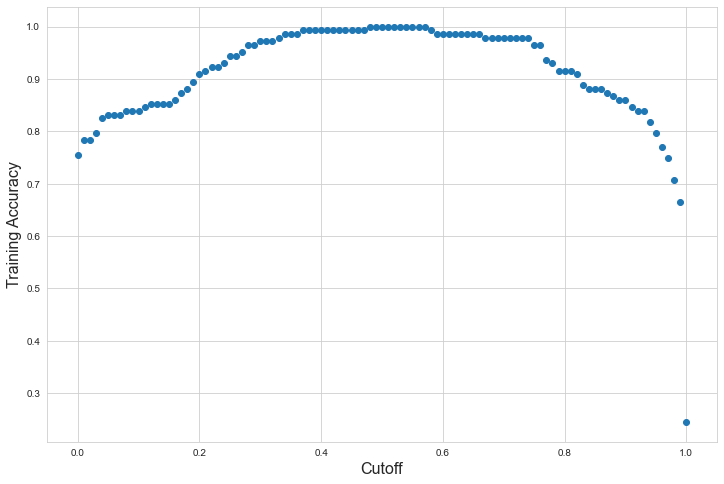

In [12]:
plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

In [13]:
print("A .1 unit increase in our feature multiplies" + 
      " the odds of being classified as 1 by " + 
      str(np.round(np.exp(.1*log_reg.coef_[0][0]),2)))

A .1 unit increase in our feature multiplies the odds of being classified as 1 by 0.95
